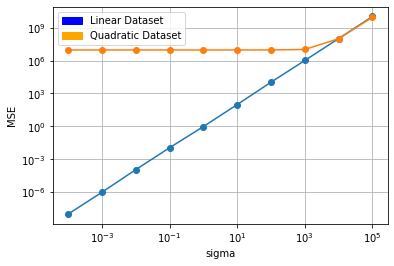

In [498]:
import numpy as np
from matplotlib import pyplot as plt
import random
import matplotlib.patches as mpatches
import csv

# Feel free to import other packages, if needed.
# As long as they are supported by CSL machines.


def get_dataset(filename):
    """
    TODO: implement this function.

    INPUT: 
        filename - a string representing the path to the csv file.

    RETURNS:
        An n by m+1 array, where n is # data points and m is # features.
        The labels y should be in the first column.
    """
    dataset = []
    dataset = np.genfromtxt('bodyfat.csv', delimiter=',', skip_header = 1)
    dataset = np.delete(dataset, 0, 1)
    return dataset


def print_stats(dataset, col):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        col     - the index of feature to summarize on. 
                  For example, 1 refers to density.

    RETURNS:
        None
    """
    column = [row[col] for row in dataset]
    length = len(column)
    print(length)
    total = 0
    for i in column:
        total = total + i
    avg = total/length
    print(round(avg, 2))
    std = 0
    for vect in column:
        diff = vect - avg
        totalstd = diff * diff
        std = std + totalstd
    std = std/(length-1)
    std = std ** 0.5
    print(round(std, 2))
    pass


def regression(dataset, cols, betas):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        cols    - a list of feature indices to learn.
                  For example, [1,8] refers to density and abdomen.
        betas   - a list of elements chosen from [beta0, beta1, ..., betam]

    RETURNS:
        mse of the regression model
    """
    mse = 0
    columnY = [row[0] for row in dataset]
    numOfCols = len(columnY)
    errorsSquared = 0
    betaNull = betas[0]
    rownum = len([row[cols[0]] for row in dataset])
    for datapoint in range(0, rownum):
        betaIndex = 1
        errors = 0
        for colnum in cols:
            column = [row[colnum] for row in dataset]
            errors = errors + (betas[betaIndex] * column[datapoint])
            betaIndex = betaIndex + 1
        errors = errors + betaNull - columnY[datapoint]
        errorsSquared = errors * errors
        mse = mse + errorsSquared
    mse = mse/numOfCols
    return mse


def gradient_descent(dataset, cols, betas):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        cols    - a list of feature indices to learn.
                  For example, [1,8] refers to density and abdomen.
        betas   - a list of elements chosen from [beta0, beta1, ..., betam]

    RETURNS:
        An 1D array of gradients
    """
    grads = []
    columnY = [row[0] for row in dataset]
    numOfCols = len(columnY)
    errorsSquared = 0
    betaNull = betas[0]
    multiplyBy = 0
    columnNeeded = -2
    rownum = len([row[cols[0]] for row in dataset])
    #this for loop is for each element in the return array
    for betaNum in range(0, len(betas)):
        #this for loop goes through the different rows
        columnNeeded += 1
        total = 0
        for datapoint in range(0, rownum):
            betaIndex = 1
            errors = 0
            #this for loop goes through the different columns
            errors += betaNull - columnY[datapoint]
            for colnum in cols:
                if (colnum == cols[columnNeeded]):
                    rightCol = [row[colnum] for row in dataset]
                column = [row[colnum] for row in dataset]
                errors += (betas[betaIndex] * column[datapoint])
                betaIndex += 1
                if (betaNum != 0 and colnum == cols[len(cols)-1]):
                    errors *= rightCol[datapoint]
            total += errors
        total = (total/numOfCols)*2
        grads.append(total)
    return grads


def iterate_gradient(dataset, cols, betas, T, eta):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        cols    - a list of feature indices to learn.
                  For example, [1,8] refers to density and abdomen.
        betas   - a list of elements chosen from [beta0, beta1, ..., betam]
        T       - # iterations to run
        eta     - learning rate

    RETURNS:
        None
    """
    for time in range(1, T + 1):
        print(time, end=' ')
        gradient = gradient_descent(dataset, cols, betas)
        for i in range(len(betas)):
            betas[i] -= eta * gradient[i]
        print(round(regression(dataset, cols, betas), 2), end=' ')
        for beta in betas:
            print(round(beta,2), end=' ')
        print()
    pass


def compute_betas(dataset, cols):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        cols    - a list of feature indices to learn.
                  For example, [1,8] refers to density and abdomen.

    RETURNS:
        A tuple containing corresponding mse and several learned betas
    """
    betas = ()
    colY = [row[0] for row in dataset]
    mse = 0
    array = [[]]
    array[0] = [1] * dataset.shape[0]
    for col in cols:
        array.append([row[col] for row in dataset])
    array = np.asarray(array).T
    inverse = np.linalg.inv(np.dot(array.T, array))
    betas = np.dot(np.dot(inverse, array.T), colY)
    mse = regression(dataset, cols, betas)
    return (mse, *betas)


def predict(dataset, cols, features):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        cols    - a list of feature indices to learn.
                  For example, [1,8] refers to density and abdomen.
        features- a list of observed values

    RETURNS:
        The predicted body fat percentage value
    """
    betas = compute_betas(dataset, cols)
    result = betas[1]
    for i in range(0, len(cols)):
        result += betas[i+2]*features[i]
    return result


def synthetic_datasets(betas, alphas, X, sigma):
    """
    TODO: implement this function.

    Input:
        betas  - parameters of the linear model
        alphas - parameters of the quadratic model
        X      - the input array (shape is guaranteed to be (n,1))
        sigma  - standard deviation of noise

    RETURNS:
        Two datasets of shape (n,2) - linear one first, followed by quadratic.
    """
    linData = []
    quadData = []
    
    for data in X:
        random = np.random.normal(loc=0.0, scale=sigma)
        linData.append(betas[0] + (betas[1]*data) + random)
        random = np.random.normal(loc=0.0, scale=sigma)
        quadData.append(alphas[0] + (alphas[1]*(data**2)) + random)
    linear = np.asarray([linData, X]).T
    quadratic = np.asarray([quadData, X]).T
    if (len(linear.shape) == 3):
        linear = np.reshape(linear, (-1,2))
    if (len(quadratic.shape) == 3):
        quadratic = np.reshape(quadratic, (-1,2))
    return linear, quadratic


def plot_mse():
    from sys import argv
    if len(argv) == 2 and argv[1] == 'csl':
        import matplotlib
        matplotlib.use('Agg')

    # TODO: Generate datasets and plot an MSE-sigma graph
    X = []
    for input in range(1000):
        X.append(random.randint(-100, 100))
    sigmas = []
    for exponent in range(-4, 6):
        sigmas.append(10 ** exponent)
    betas = [2, 1]
    alphas = [2, 1]
    line_mse = []
    quad_mse = []
    for sigma in sigmas:
        linear, quadratic = synthetic_datasets(betas, alphas, X, sigma)
        line_mse.append(compute_betas(linear, cols=[1])[0])
        quad_mse.append(compute_betas(quadratic, cols=[1])[0])
    figure = plt.figure()
    plt.plot(sigmas, line_mse, '-o')
    plt.plot(sigmas, quad_mse, '-o')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('MSE')
    plt.xlabel('sigma')
    linearData = mpatches.Patch(color='blue', label = 'Linear Dataset')
    quadraticData = mpatches.Patch(color='orange', label = 'Quadratic Dataset')
    plt.legend(handles=[linearData, quadraticData])
    plt.grid(True)
    figure.savefig('mse.pdf')

if __name__ == '__main__':
    ### DO NOT CHANGE THIS SECTION ###
    plot_mse()
